In [16]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [17]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [18]:
coordinates = list(lat_lngs)

In [19]:
from citipy import citipy

In [20]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-6.6320466941539 -50.00273656216
-31.523966688630466 80.77914603756713
63.662648641865104 57.3769380201561
61.33027598487445 -72.93549676239857
-48.49400417884264 -24.33802832372662
81.59709954480473 2.868552462486619
-46.538090338898726 86.36047616940601
-76.14374173530234 -2.337400805467098
-55.08351826341979 81.19477962018021
-88.78164212615728 -16.200090317064635
-83.90497125410842 -58.9069668965561
19.302649539820365 -62.41594819036874
76.35211118405135 -85.46733304078731
-2.415150204101053 -77.7611266905325
16.16016750288408 -82.25662046826193
-34.776221405822525 -0.22194122609924705
-58.73073311136845 -6.444820508549498
34.78183975793257 6.8451379918494695
3.5520826727401413 63.53095155031204
-61.88807100487715 -4.08452463422752
22.82516821197119 -29.82149794440835
-58.80679195368727 89.43474095399088
-46.40192907127148 -56.738546000737365
-87.39534636320128 55.81143885373743
62.45154744388162 -75.19351453064115
39.257678279140606 31.00597254592256
7.899038669729862 -0.593877400

-67.62126266052972 27.049036968882575
-42.85906722643013 70.85852386168162
14.758558337811351 40.92528822473679
-1.2054794535747675 85.20170269800238
40.533235900407306 -48.2318530263721
60.865614676421785 -15.068195047364355
10.314045468123155 -35.98290399503562
-57.91158818205601 22.377785359028138
-58.6881214165053 33.95691362587998
-85.11282733393733 -17.421466871063274
27.219199658707012 -25.789856100151795
-21.182118985191465 -63.56848172699853
-62.1097457058583 -73.51452560137349
-31.49325757445167 5.6868616585193195
76.66083732681474 20.786881749472172
18.285246004713443 62.107530696929956
52.93237630583357 -62.0420892145077
-46.47921819131046 -30.096667810507313
86.02514041034772 -53.97614650244011
57.817377021858704 9.003177534243818
-44.5925704877075 33.040453945589746
-1.8941911439168706 -27.62132487064956
-31.140799143314453 -1.4087855207886264
-76.01873849683213 61.381782841083236
-50.51633379740932 -32.43197899065503
-24.593374702063656 -65.89790855867405
-5.287643436261

-16.90431161627835 53.592243305720956
6.808636282994513 8.608977300637335
33.61807691833991 65.29246779349435
66.74069890963128 -7.242489012598384
32.76461174076796 -84.7150977754797
77.97821904031775 65.87787063590508
-6.482306513246442 57.600876926283746
37.16064429340109 46.387037535651444
-48.34363055987963 42.81843052467525
3.3812155325967552 -39.634801708509876
52.32300344532439 61.305097638706314
-5.2037665804148645 73.78433297388042
66.71880696588855 -45.62658145919657
-75.92116541241539 62.723784837249724
85.55849484093218 42.958524248700314
80.29441187721906 -45.74819666116282
11.778725946338668 44.25766592561055
-50.768972060067696 69.66610196094891
-10.361306989041253 53.6523082759669
33.501222909322166 70.56113353873295
77.23480203036553 -42.403351154755185
-32.40290449599842 -60.2510349818892
1.5646484110045975 -49.7086178254632
9.70697907627573 76.47805295697754
-50.90652540586302 73.52192670485124
-28.18031216315339 -61.60555934479775
19.8356718217493 -6.954976048702818

In [21]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then add it to the list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

592

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key
# city = "Boston"
# query_url = url + "&q=" + city
# print(query_url)

In [7]:
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [8]:
# weather_json.keys()

In [9]:
# Make a 'Get' request for the city weather
# city_weather = requests.get(query_url)
# city_weather

In [24]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count+=1
# Run the API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | sao geraldo do araguaia
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | vuktyl
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | the valley
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | macas
Processing Record 13 of Set 1 | iralaya
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | naftah
City not found. Skipping...
Processing Record 17 of Set 1 | kudahuvadhoo
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | emirdag

Processing Record 33 of Set 4 | niamey
Processing Record 34 of Set 4 | port-gentil
Processing Record 35 of Set 4 | punta arenas
Processing Record 36 of Set 4 | kostomuksha
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | puerto maldonado
Processing Record 39 of Set 4 | santo tomas
Processing Record 40 of Set 4 | shieli
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | vetapalem
Processing Record 43 of Set 4 | nara
Processing Record 44 of Set 4 | solsvik
City not found. Skipping...
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | kano
Processing Record 49 of Set 4 | elizabethtown
Processing Record 50 of Set 4 | bereda
Processing Record 1 of Set 5 | neustadt
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | saint-leu
Processing Record 4 of Set 5 | eqbaliyeh
Processing Record 5 of Set 

Processing Record 20 of Set 8 | andros town
Processing Record 21 of Set 8 | muros
Processing Record 22 of Set 8 | anori
Processing Record 23 of Set 8 | prado
Processing Record 24 of Set 8 | mana
Processing Record 25 of Set 8 | salvador
Processing Record 26 of Set 8 | moengo
Processing Record 27 of Set 8 | ugoofaaru
Processing Record 28 of Set 8 | lebu
Processing Record 29 of Set 8 | kurkino
Processing Record 30 of Set 8 | yangambi
Processing Record 31 of Set 8 | inongo
Processing Record 32 of Set 8 | caucaia
Processing Record 33 of Set 8 | springbok
Processing Record 34 of Set 8 | van
Processing Record 35 of Set 8 | baneh
Processing Record 36 of Set 8 | thompson
Processing Record 37 of Set 8 | san-pedro
Processing Record 38 of Set 8 | duz
City not found. Skipping...
Processing Record 39 of Set 8 | denizli
Processing Record 40 of Set 8 | roslavl
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | neuquen
Processing Record 43 of Set 8 | beauceville
Processing Reco

Processing Record 12 of Set 12 | point pedro
Processing Record 13 of Set 12 | kassala
Processing Record 14 of Set 12 | pritzwalk
Processing Record 15 of Set 12 | neyshabur
Processing Record 16 of Set 12 | spring hill
Processing Record 17 of Set 12 | uniontown
Processing Record 18 of Set 12 | bahia honda
Processing Record 19 of Set 12 | tabuk
Processing Record 20 of Set 12 | westport
Processing Record 21 of Set 12 | puerto madryn
Processing Record 22 of Set 12 | natal
Processing Record 23 of Set 12 | mehnagar
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | chimore
Processing Record 26 of Set 12 | albany
Processing Record 27 of Set 12 | seevetal
Processing Record 28 of Set 12 | aripuana
Processing Record 29 of Set 12 | conde
Processing Record 30 of Set 12 | aguas belas
Processing Record 31 of Set 12 | skjervoy
Processing Record 32 of Set 12 | iquitos
Processing Record 33 of Set 12 | dvinskoy
Processing Record 34 of Set 12 | boende
Processing Record 35 of Set 12 | 

In [25]:
len(city_data)

543

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Geraldo Do Araguaia,-6.4006,-48.5550,301.49,27,7,1.92,BR,2022-10-02 00:45:46
1,Bambous Virieux,-20.3428,57.7575,294.29,60,40,4.12,MU,2022-10-02 00:45:46
2,Vuktyl,63.8567,57.3094,277.32,94,100,4.46,RU,2022-10-02 00:45:46
3,Iqaluit,63.7506,-68.5145,271.00,79,20,6.71,CA,2022-10-02 00:45:47
4,Arraial Do Cabo,-22.9661,-42.0278,293.50,85,44,8.11,BR,2022-10-02 00:44:11


In [28]:
# Re-order the columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Geraldo Do Araguaia,BR,2022-10-02 00:45:46,-6.4006,-48.5550,301.49,27,7,1.92
1,Bambous Virieux,MU,2022-10-02 00:45:46,-20.3428,57.7575,294.29,60,40,4.12
2,Vuktyl,RU,2022-10-02 00:45:46,63.8567,57.3094,277.32,94,100,4.46
3,Iqaluit,CA,2022-10-02 00:45:47,63.7506,-68.5145,271.00,79,20,6.71
4,Arraial Do Cabo,BR,2022-10-02 00:44:11,-22.9661,-42.0278,293.50,85,44,8.11


In [30]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [33]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

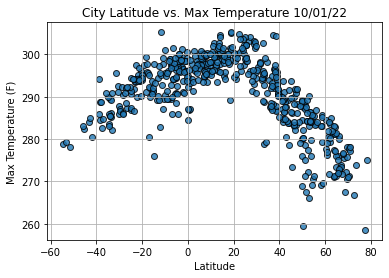

In [34]:
# Import time module
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1,marker='o',
           alpha=0.8,label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig1.png')
#Shot plot
plt.show()

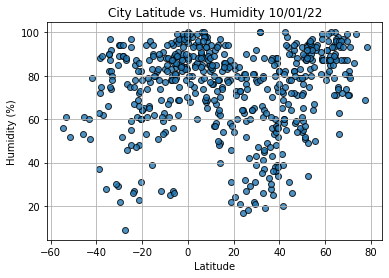

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

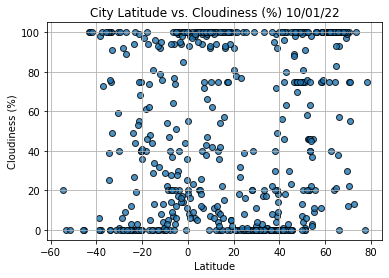

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

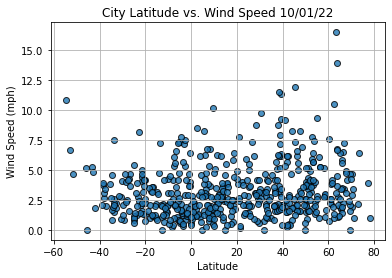

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()